In [1]:
import os 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from tqdm import tqdm
from scipy.special import comb

import time
import seaborn as sns

PLOT_PATH = os.path.join("/Users", "jcheigh", "Thesis", "plots")

primes = [1366769, 1654879, 122957, 174143, 1033, 1483]
H_vals = [1, 5, 20, 100]

def R(x, H=30):
    # x is a vector 
    y = x % (2 * np.pi)
    y[y == np.pi] = 0  # Handle the special case where y equals pi

    # Calculating R for all y values
    n = np.arange(1, H + 1)
    sin_term = np.sin(np.outer(y, n)) / n
    return (np.pi - y) / 2 - np.sum(sin_term, axis=1)

def create_1i(primes, H_vals, error=False):
    for k in tqdm(primes):
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        title = f's vs. R(2πs/k) for k = {k} (k = {k%4} mod 4)'
        fig.suptitle(title)

        # Compute s values and corresponding R values for each H
        s_values = np.arange(1, k)
        x_values = 2 * np.pi * s_values / k

        for i, H in enumerate(H_vals):
            R_values = R(x_values, H)
            # Plotting
            ax = axs[i // 2, i % 2]
            ax.scatter(s_values, R_values, label=f'H = {H}')
            if error:
                error_values = k / (2 * H * s_values)
                ax.plot(s_values, error_values, 'r--', label='Error +')
                ax.plot(s_values, -error_values, 'r--', label='Error -')
                
            ax.set_title(f'H = {H}')
            ax.set_xlabel('s')
            ax.set_ylabel(f'R(2πs/{k})')
            ax.legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
        plt.close(fig)
        
#create_1i(primes, H_vals)

  0%|          | 0/6 [00:00<?, ?it/s]

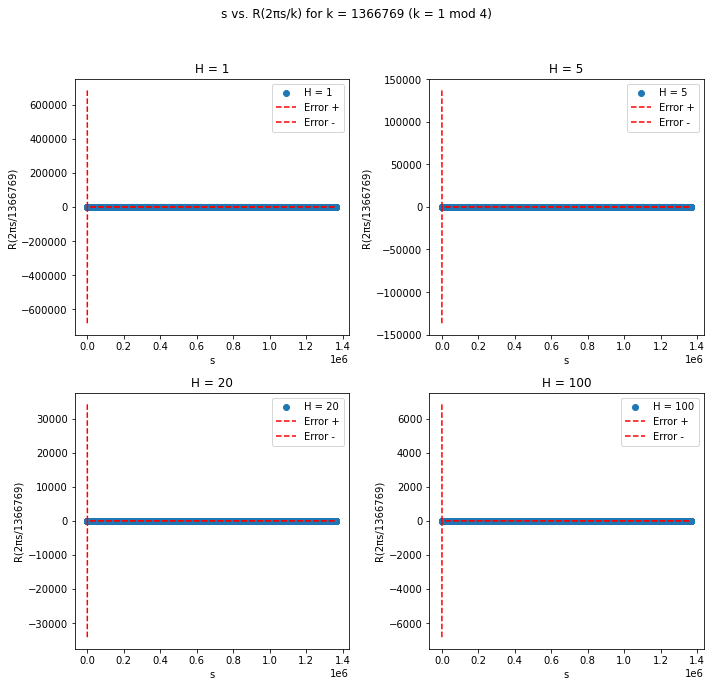

 17%|█▋        | 1/6 [00:28<02:24, 28.92s/it]

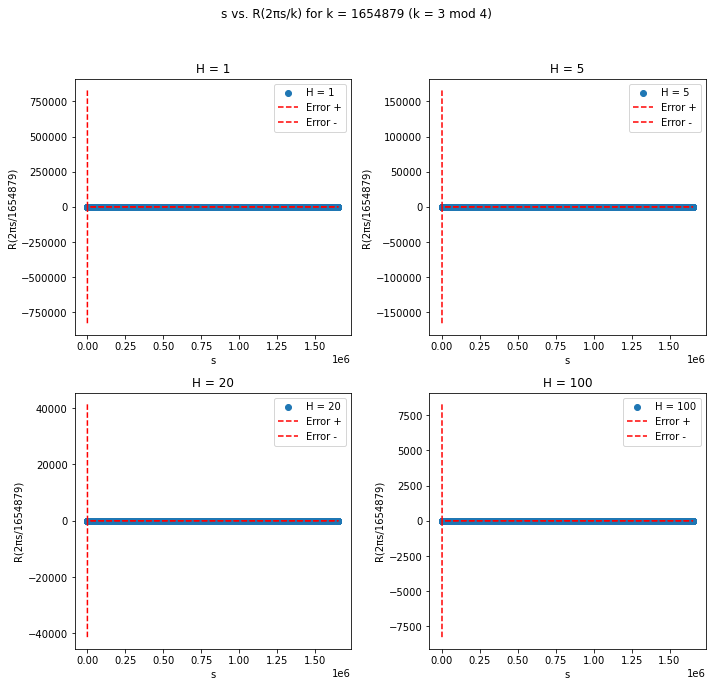

 33%|███▎      | 2/6 [01:04<02:11, 32.92s/it]

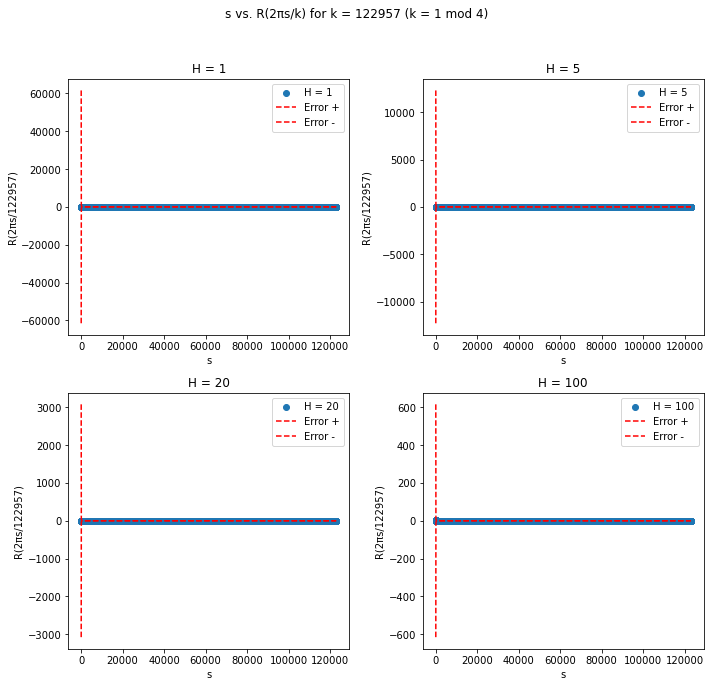

 50%|█████     | 3/6 [01:07<00:57, 19.08s/it]

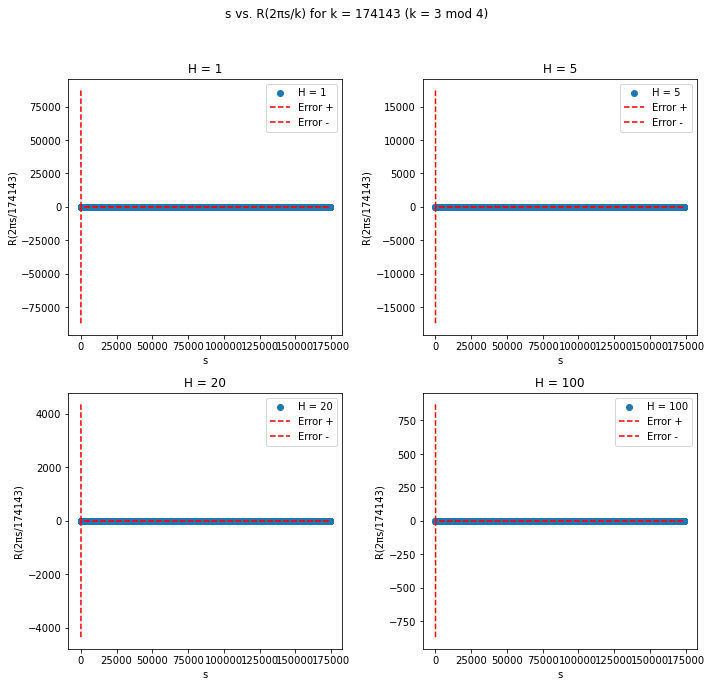

 67%|██████▋   | 4/6 [01:10<00:25, 12.99s/it]

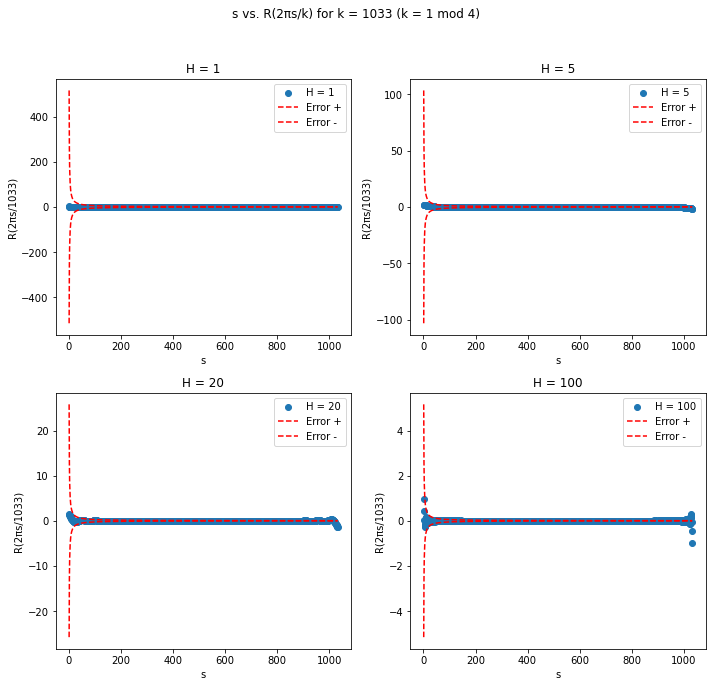

 83%|████████▎ | 5/6 [01:11<00:08,  8.41s/it]

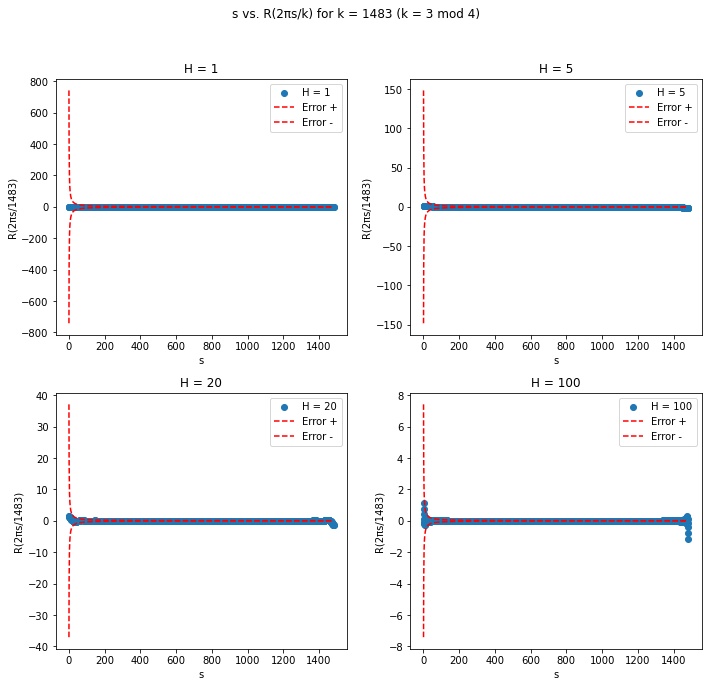

100%|██████████| 6/6 [01:11<00:00, 11.92s/it]


In [5]:
create_1i(primes, H_vals, error=True)

In [2]:
def r_sum(k, H_vals):
    """
    Computes the sum of R(2pi * s / k) and the sum of the absolute value of R(2pi * s / k)
    for different H values in a vectorized manner.

    :param k: The prime number.
    :param H_vals: A list of H values.
    :return: Two arrays - sum of R values and sum of absolute R values for each H.
    """
    s_values = np.arange(1, k)
    x_values = 2 * np.pi * s_values / k

    sum_abs_R = []
    for H in H_vals:
        R_values = R(x_values, H)
        sum_abs_R.append(np.sum(np.abs(R_values)))

    return np.array(sum_abs_R)

def create_2i(primes, H_vals, error=False):
    H_vals_sorted = sorted(H_vals)

    for k in primes:
        plt.figure(figsize=(8, 6))
        title = f'Sum of |R| for k = {k} vs. H'
        plt.title(title)

        sum_abs_R = r_sum(k, H_vals_sorted)

        # Plot for sum of absolute R values
        plt.plot(H_vals_sorted, sum_abs_R, marker='o', label='Sum of |R(2πs/k)|')
        plt.xlabel('H')
        plt.ylabel('Sum of |R(2πs/k)|')

        if error:
            error = k * np.log(k) / np.array(H_vals_sorted)
            plt.errorbar(H_vals_sorted, sum_abs_R, yerr=error, fmt='o', ecolor='red', capsize=5, label='Error')

        plt.legend()
        plt.tight_layout()
        plt.show()

H_vals = list(range(20))

#create_2i(primes, H_vals)

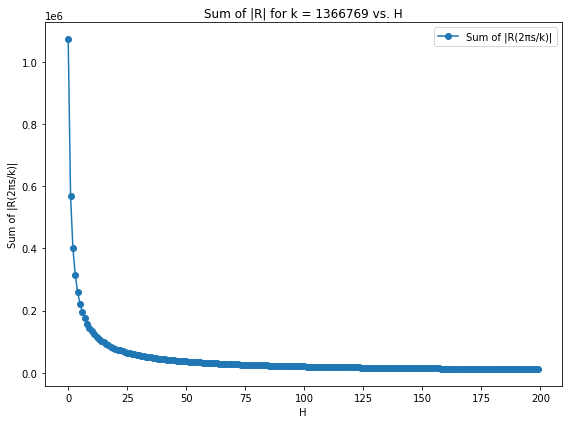

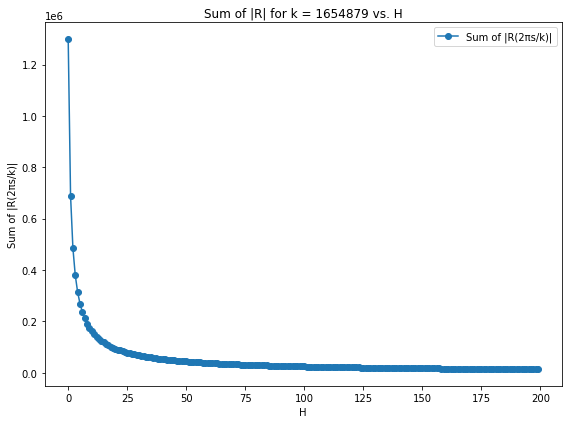

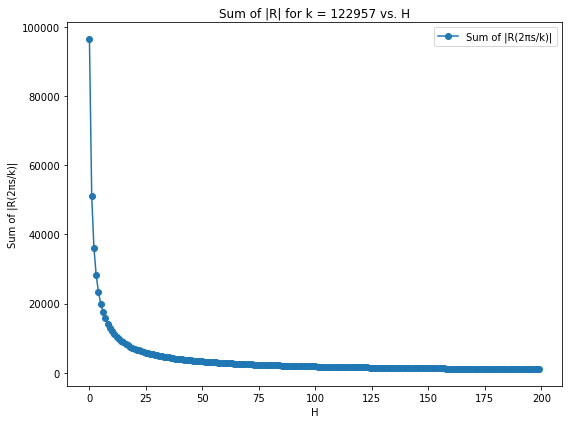

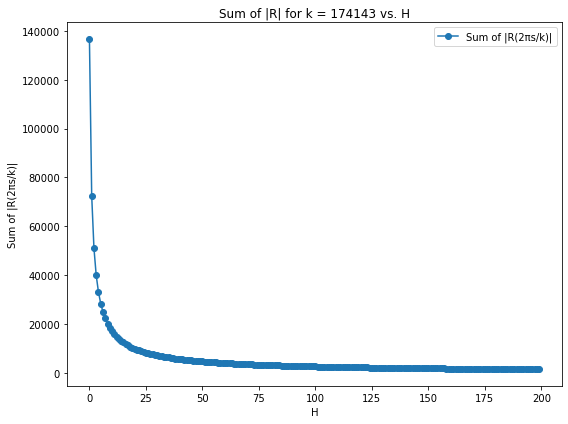

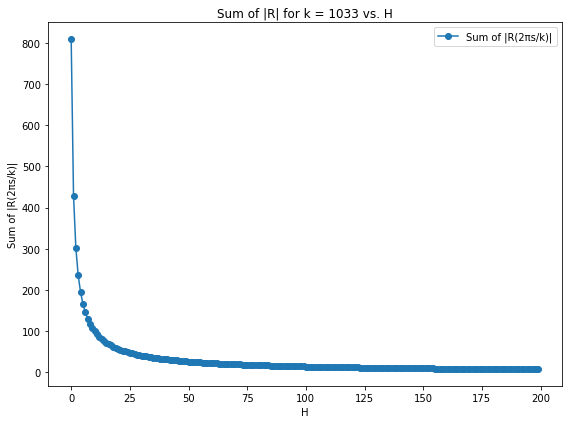

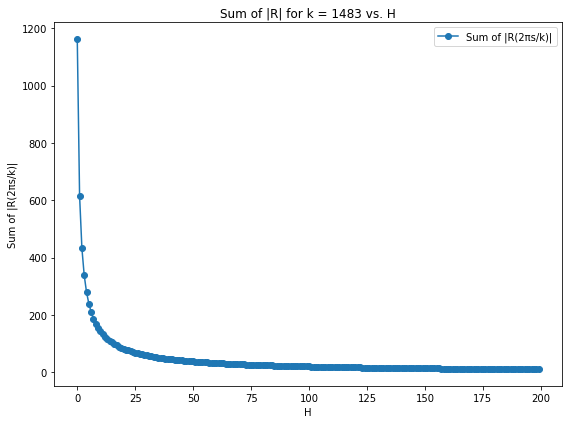

In [7]:
H_vals = list(range(200))

create_2i(primes, H_vals)

1
234


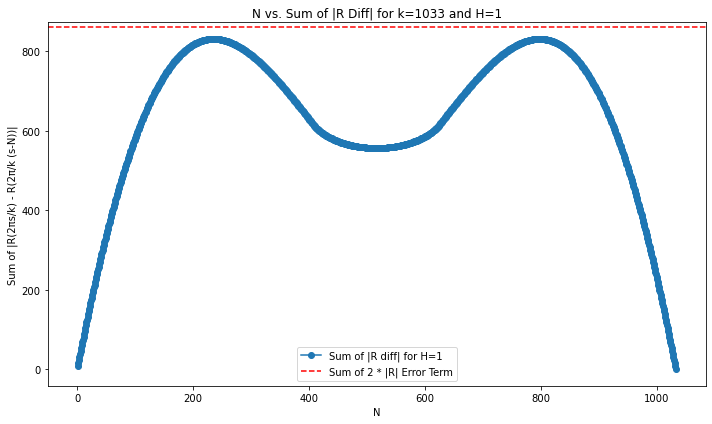

5
74


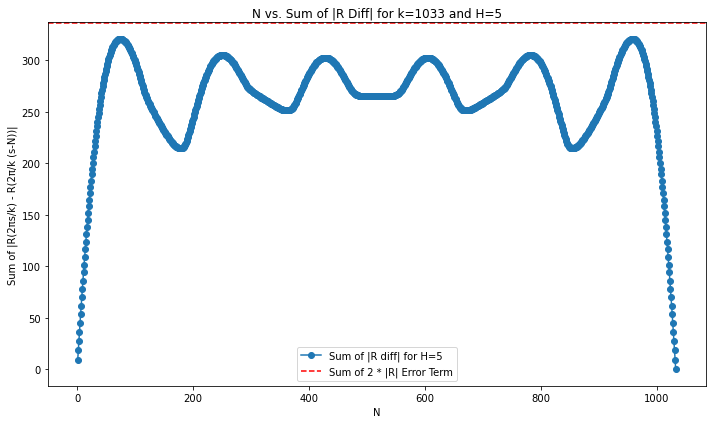

20
20


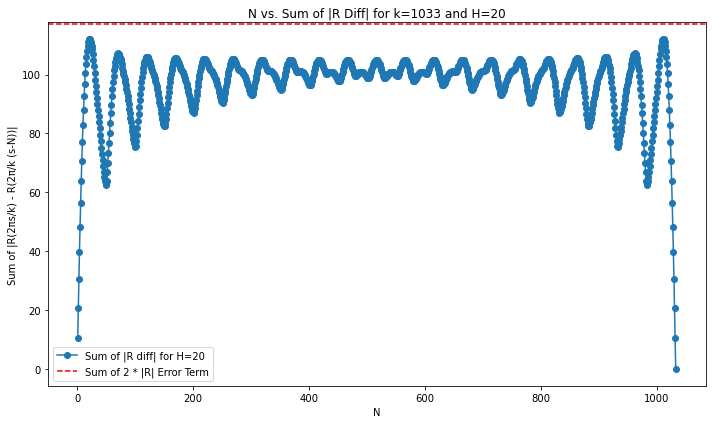

100
3


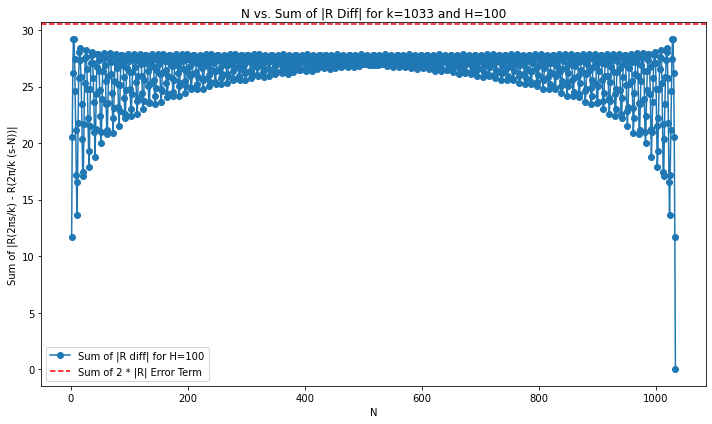

In [4]:
def r_diff_sum(k, H, N):
    """
    Computes the sum of |R(2πs/k) - R(2π/k * (s-N))| for s in range(1, k+1)
    in a vectorized manner for different values of N.

    :param k: The prime number.
    :param H: The value of H.
    :param N: Array of N values.
    :return: Array of sums for each N.
    """
    s_values = np.arange(1, k + 1)
    x_values = 2 * np.pi * s_values / k

    R_values = R(x_values, H)

    sum_diff = []
    for n in N:
        shifted_s_values = np.arange(1, k + 1) - n
        shifted_x_values = 2 * np.pi * shifted_s_values / k
        shifted_R_values = R(shifted_x_values, H)
        sum_diff.append(np.sum(np.abs(R_values - shifted_R_values)))

    return np.array(sum_diff)

def create_3i(k, H_vals):
    for H in H_vals:
        N_values = np.arange(1, k + 1)
        sum_diff = r_diff_sum(k, H, N_values)
        print(H)
        print(np.argmax(sum_diff))
        sum_abs_R = np.sum(np.abs(R(2 * np.pi * np.arange(1, k + 1) / k, H)))

        plt.figure(figsize=(10, 6))
        plt.plot(N_values, sum_diff, marker='o', label=f'Sum of |R diff| for H={H}')
        plt.axhline(y=2 * sum_abs_R, color='r', linestyle='--', label='Sum of 2 * |R| Error Term')
        plt.title(f'N vs. Sum of |R Diff| for k={k} and H={H}')
        plt.xlabel('N')
        plt.ylabel('Sum of |R(2πs/k) - R(2π/k (s-N))|')
        plt.legend()
        plt.tight_layout()
        plt.show()

H_vals = [1, 5, 20, 100]

create_3i(1033, H_vals)

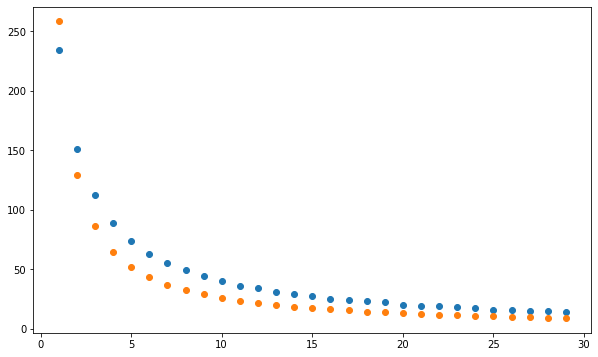

In [20]:
k = 1033
vals = []
for H in range(1, 30):
    vals.append(np.argmax(r_diff_sum(k, H, np.arange(1, (k+1)//2))))

plt.figure(figsize=(10,6))
plt.scatter(list(range(1, 30)), vals)
H = np.arange(1, 30)
y = (k)/(4 * H)
plt.scatter(H, y)
plt.show()

1
2392


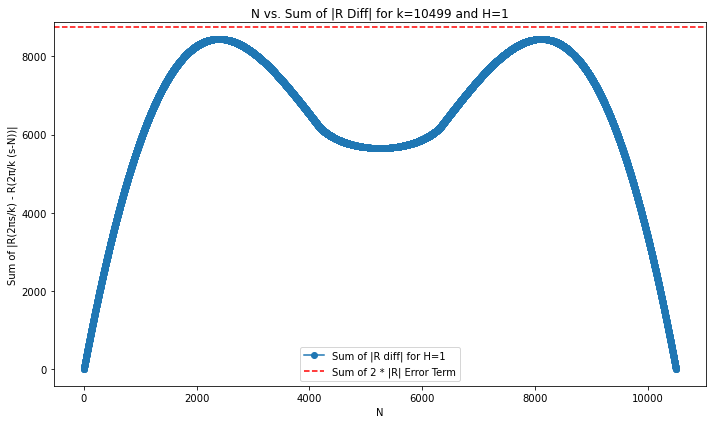

5
757


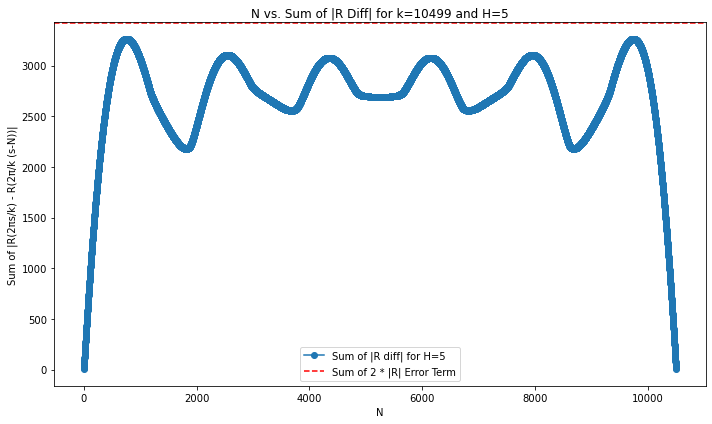

20
217


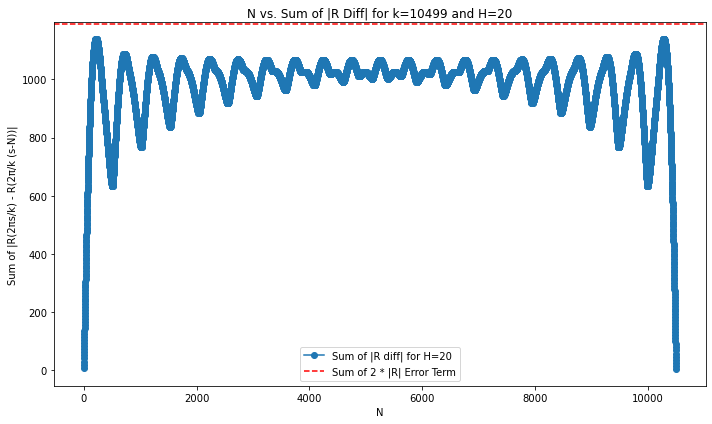

100
46


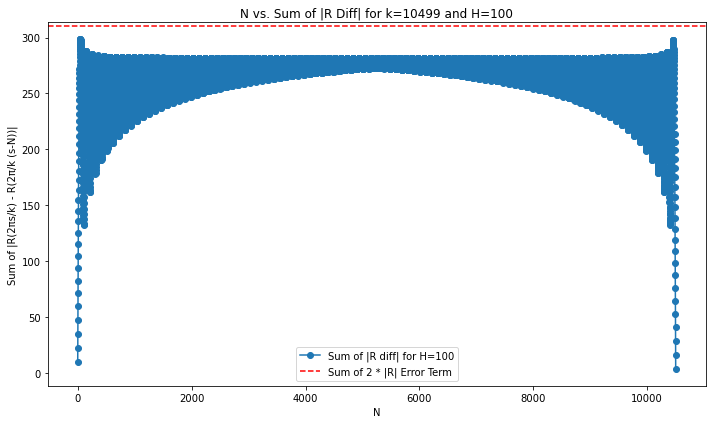

In [5]:
create_3i(10499, H_vals)

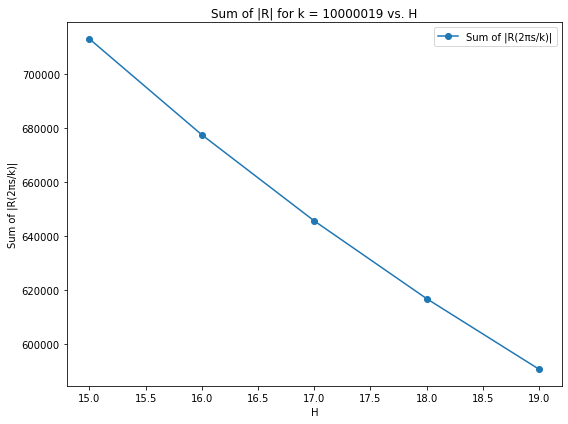

In [1]:


H_vals = list(range(15, 20))

create_2i(primes, H_vals)

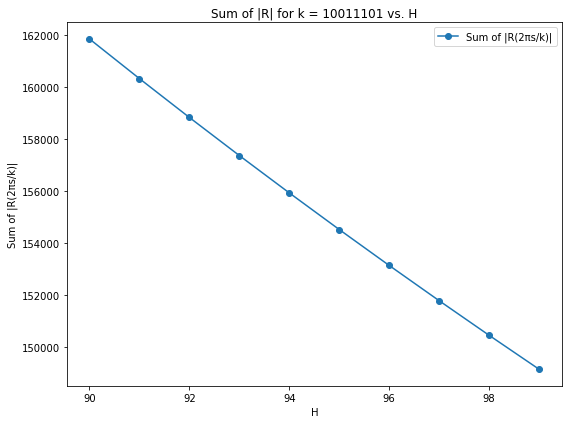

In [3]:
primes =[10011101]
H_vals = list(range(90,100))
create_2i(primes, H_vals)

In [4]:
import os 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from tqdm import tqdm
from scipy.special import comb

import time
import seaborn as sns

PLOT_PATH = os.path.join("/Users", "jcheigh", "Thesis", "plots")

primes = [10000019]
H_vals = [1, 5, 20]

def R(x, H=30):
    # x is a vector 
    y = x % (2 * np.pi)
    y[y == np.pi] = 0  # Handle the special case where y equals pi

    # Calculating R for all y values
    n = np.arange(1, H + 1)
    sin_term = np.sin(np.outer(y, n)) / n
    return (np.pi - y) / 2 - np.sum(sin_term, axis=1)

def r_sum(k, H_vals):
    """
    Computes the sum of R(2pi * s / k) and the sum of the absolute value of R(2pi * s / k)
    for different H values in a vectorized manner.

    :param k: The prime number.
    :param H_vals: A list of H values.
    :return: Two arrays - sum of R values and sum of absolute R values for each H.
    """
    s_values = np.arange(1, k)
    x_values = 2 * np.pi * s_values / k

    sum_abs_R = []
    for H in H_vals:
        R_values = R(x_values, H)
        sum_abs_R.append(np.sum(np.abs(R_values)))

    return np.array(sum_abs_R)

def create_2i(primes, H_vals, error=False):
    H_vals_sorted = sorted(H_vals)

    for k in primes:
        plt.figure(figsize=(8, 6))
        title = f'Sum of |R| for k = {k} vs. H'
        plt.title(title)

        sum_abs_R = r_sum(k, H_vals_sorted)

        # Plot for sum of absolute R values
        plt.plot(H_vals_sorted, sum_abs_R, marker='o', label='Sum of |R(2πs/k)|')
        plt.xlabel('H')
        plt.ylabel('Sum of |R(2πs/k)|')

        if error:
            error = k * np.log(k) / np.array(H_vals_sorted)
            plt.errorbar(H_vals_sorted, sum_abs_R, yerr=error, fmt='o', ecolor='red', capsize=5, label='Error')

        plt.legend()
        plt.tight_layout()
        plt.show()

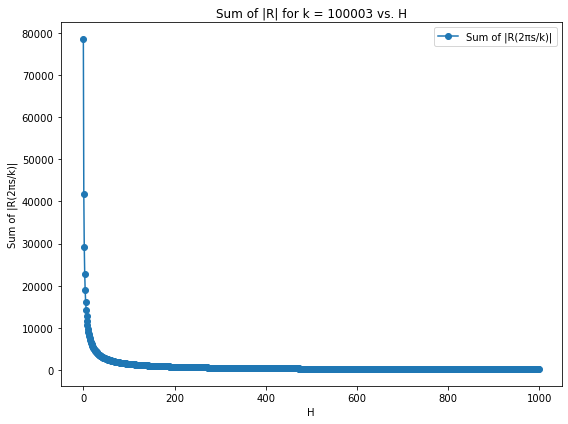

In [5]:
primes =[100003]
H_vals = list(range(1000))
create_2i(primes, H_vals)

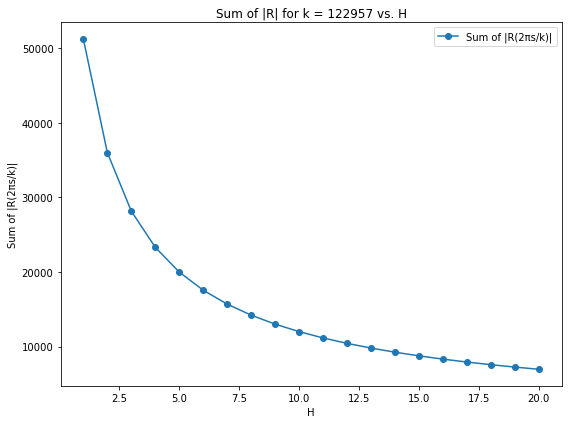

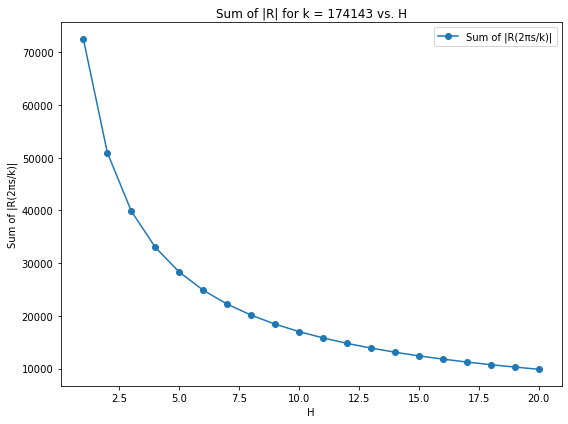

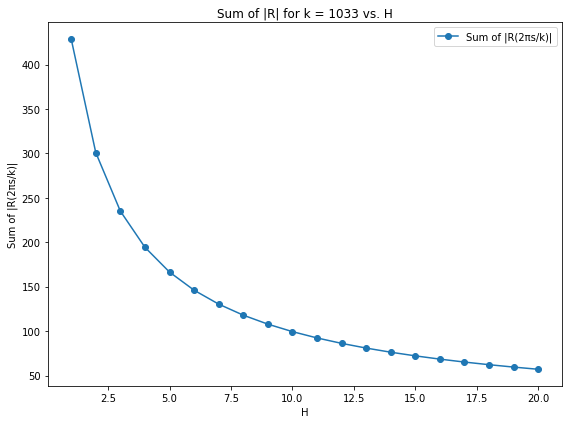

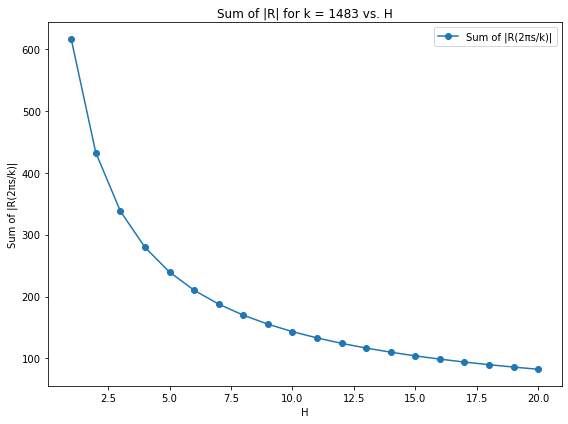

In [17]:
import os 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from tqdm import tqdm
from scipy.special import comb

import time
import seaborn as sns

PLOT_PATH = os.path.join("/Users", "jcheigh", "Thesis", "plots")

primes = [122957, 174143, 1033, 1483]
H_vals = [1, 5, 20]

def R(x, H=30):
    # x is a vector 
    y = x % (2 * np.pi)
    y[y == np.pi] = 0  # Handle the special case where y equals pi

    # Calculating R for all y values
    n = np.arange(1, H + 1)
    sin_term = np.sin(np.outer(y, n)) / n
    return (np.pi - y) / 2 - np.sum(sin_term, axis=1)

def create_1i(primes, H_vals, error=False):
    for k in tqdm(primes):
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        title = f's vs. R(2πs/k) for k = {k} (k = {k%4} mod 4)'
        fig.suptitle(title)

        # Compute s values and corresponding R values for each H
        s_values = np.arange(1, k)
        x_values = 2 * np.pi * s_values / k

        for i, H in enumerate(H_vals):
            R_values = R(x_values, H)
            # Plotting
            ax = axs[i // 2, i % 2]
            ax.scatter(s_values, R_values, label=f'H = {H}')
            if error:
                error_values = k / (2 * H * s_values)
                ax.plot(s_values, error_values, 'r--', label='Error +')
                ax.plot(s_values, -error_values, 'r--', label='Error -')
                
            ax.set_title(f'H = {H}')
            ax.set_xlabel('s')
            ax.set_ylabel(f'R(2πs/{k})')
            ax.legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
        plt.close(fig)
        
        
def r_sum(k, H_vals):
    """
    Computes the sum of R(2pi * s / k) and the sum of the absolute value of R(2pi * s / k)
    for different H values in a vectorized manner.

    :param k: The prime number.
    :param H_vals: A list of H values.
    :return: Two arrays - sum of R values and sum of absolute R values for each H.
    """
    s_values = np.arange(1, k)
    x_values = 2 * np.pi * s_values / k

    sum_abs_R = []
    for H in H_vals:
        R_values = R(x_values, H)
        sum_abs_R.append(np.sum(np.abs(R_values)))

    return np.array(sum_abs_R)

def create_2i(primes, H_vals, error=False):
    H_vals_sorted = sorted(H_vals)

    for k in primes:
        plt.figure(figsize=(8, 6))
        title = f'Sum of |R| for k = {k} vs. H'
        plt.title(title)

        sum_abs_R = r_sum(k, H_vals_sorted)

        # Plot for sum of absolute R values
        plt.plot(H_vals_sorted, sum_abs_R, marker='o', label='Sum of |R(2πs/k)|')
        plt.xlabel('H')
        plt.ylabel('Sum of |R(2πs/k)|')

        if error:
            error1 = np.sqrt(k) * np.log(k)**2 / np.array(H_vals_sorted)
            error2 = k * np.log(k) / np.array(H_vals_sorted)
            #plt.plot(H_vals_sorted, error1, 'r--', label='sqrt k Error')
            #plt.plot(H_vals_sorted, error2, 'r--', label='k Error')
        plt.legend()
        plt.tight_layout()
        plt.show()

H_vals = list(range(1, 21))

create_2i(primes, H_vals, error=True)

In [25]:
k = 1033
print(r_sum(k, list(range(1, 201))))

[428.84711503 300.92212957 235.04458534 194.32090548 166.4279813
 146.00851961 130.34585376 117.9265142  107.81562365  99.40003286
  92.28194125  86.17942443  80.87576948  76.22345726  72.11575531
  68.4428613   65.12808605  62.16667599  59.47343761  57.00783881
  54.76412783  52.65624205  50.76353972  48.96841185  47.34385677
  45.77152408  44.36267715  42.97116415  41.73970194  40.55966757
  39.412227    38.3735606   37.36947639  36.41474904  35.50260857
  34.65083565  33.86972811  33.06412078  32.30566283  31.6192849
  30.98232757  30.30886047  29.70492559  29.06963457  28.49271838
  27.98662075  27.46130228  26.97252499  26.48780363  25.97397274
  25.56145015  25.05700119  24.63326136  24.26114301  23.90113995
  23.52443937  23.14295062  22.79298659  22.43551666  22.09193233
  21.72490708  21.3758578   21.07899563  20.82080691  20.52158271
  20.25561127  19.98389576  19.74368008  19.49242798  19.24790475
  18.9969075   18.71351621  18.45094881  18.26151277  18.02635078
  17.7883941